# Solution to problem 1

In [48]:
import numpy as np
import maze as mz
import importlib
import matplotlib.pyplot as plt
import time

In [55]:
x = np.random.geometric(p=1/30)
print(x)

13


## Problem 1 b)
Solve the maze for T = 20, once with Minotaur "do nothing" option.

In [3]:
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0], 
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0], 
    [0, 0, 0, 0, 1, 2, 0, 0]
])

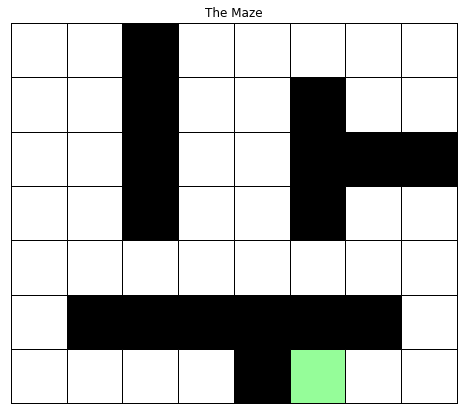

In [4]:
mz.draw_maze(maze)

In [17]:
env = mz.Maze(maze, minotaur_stay=True)
method = 'DynProg'
start = (0,0,6,5)

In [31]:
p = np.zeros((20,1))
for i in range(1,21):
    success_cnt = 0
    V, policy = mz.dynamic_programming(env, i)
    for _ in range(1000):
        path = env.simulate_dyn_prog(start, policy)
        if path[-1][0:2] == (6,5):
            success_cnt += 1
    p[i-1] = success_cnt/1e3

KeyboardInterrupt: 

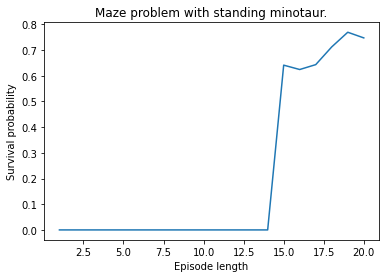

In [7]:
plt.plot(range(1,21), p)
plt.title('Maze problem with standing minotaur.')
plt.ylabel('Survival probability')
plt.xlabel('Episode length')
plt.show()

In [8]:
env = mz.Maze(maze, minotaur_stay=False)
method = 'DynProg'
start = (0,0,6,5)

In [46]:
p = np.zeros((20,1))
dp_time = 0
sim_time = 0
for i in range(1,21):
    success_cnt = 0
    t1 = time.perf_counter()
    V, policy = mz.dynamic_programming(env, i)
    t2 = time.perf_counter()
    dp_time += t2 - t1
    for _ in range(10000):
        t3 = time.perf_counter()
        path = env.simulate_dyn_prog(start, policy)
        t4 = time.perf_counter()
        sim_time += t4 -t3
        if path[-1][0:2] == (6,5):
            success_cnt += 1
    p[i-1] = success_cnt/1e4

0.0743916999999783
0.14165779999984807
0.2322164000001976
0.3056699000003391
0.3958903000002465
0.4784094999995432
0.5880004000000554
0.6578720999996222
0.8083762999999635
0.8582747999998901
0.9835782000000108
1.058525500000087
1.194850800000495
1.3012177000014162
1.4790681999998014
1.5545293000013771
1.6309192999988227
1.6863109000005352
1.8716996999992261
1.9211372000004303


sim: 67.8702857001058, dp: 19.257197400001132


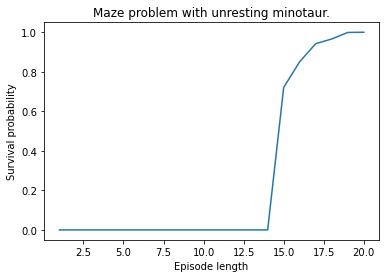

In [10]:
plt.plot(range(1,21), p)
plt.title('Maze problem with unresting minotaur.')
plt.ylabel('Survival probability')
plt.xlabel('Episode length')
plt.show()

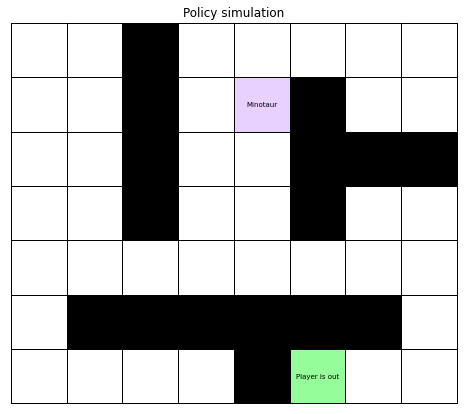

In [11]:
mz.animate_solution(maze, path)

In [12]:
print(policy.shape)

(1600, 21)


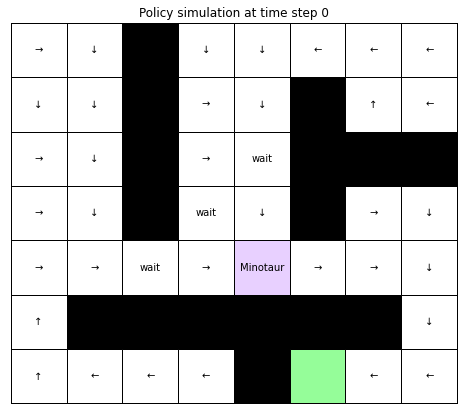

In [13]:
LIGHT_RED    = '#FFC4CC'
LIGHT_GREEN  = '#95FD99'
GRAY         = 'C0C0C0'
BLACK        = '#000000'
WHITE        = '#FFFFFF'
LIGHT_PURPLE = '#E8D0FF'
LIGHT_ORANGE = '#FAE0C3'

col_map = {0: WHITE, 1: BLACK, 2: LIGHT_GREEN, -6: LIGHT_RED, -1: LIGHT_RED}

# Size of the maze
rows,cols = maze.shape

# Create figure of the size of the maze
fig = plt.figure(1, figsize=(cols,rows))

# Remove the axis ticks and add title title
ax = plt.gca()
ax.set_title('Policy simulation at time step 0')
ax.set_xticks([])
ax.set_yticks([])

# Give a color to each cell
colored_maze = [[col_map[maze[j,i]] for i in range(cols)] for j in range(rows)]

# Create figure of the size of the maze
fig = plt.figure(1, figsize=(cols,rows))

# Create a table to color
grid = plt.table(cellText=None,
                 cellColours=colored_maze,
                 cellLoc='center',
                 loc=(0,0),
                 edges='closed')

# Modify the hight and width of the cells in the table
tc = grid.properties()['children']
for cell in tc:
    cell.set_height(1.0/rows)
    cell.set_width(1.0/cols)

minotaur_pos = (4,4)
grid.get_celld()[(minotaur_pos)].set_facecolor(LIGHT_PURPLE)
grid.get_celld()[(minotaur_pos)].get_text().set_text('Minotaur')
for x in range(7):
    for y in range(8):
        if maze[x,y] != 1 and (x,y) != (6,5) and (x,y) != minotaur_pos:
            a = policy[env.map[(x,y,*minotaur_pos)],0]
            # New markings
            if a == 0: 
                arrow = 'wait'
            elif a == 1:
                arrow = '\u2190'
            elif a == 2:
                arrow = '\u2192'
            elif a == 3:
                arrow = '\u2191'
            elif a == 4:
                arrow = '\u2193'
            grid.get_celld()[(x,y)].get_text().set_text(arrow)

## 1c) Geometric distribution

In [14]:
gamma = 29/30  # Geometric, 30 iterations on average.
epsilon = 0.0001;
V, policy = mz.value_iteration(env, gamma, epsilon)


In [28]:
success_cnt = 0
for _ in range(10000):
    path = env.simulate_val_iter(start, policy)
    if path[-1][0:2] == (6,5):
        success_cnt += 1
print(f"Probability of succeeding with E[T]=30: {success_cnt/1e4}")

Probability of succeeding with E[T]=30: 0.4756
